In [8]:
import numpy as np
import pandas as pd
import prepare as p
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [9]:
df= pd.read_csv('store.csv')
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [10]:
p.set_index(df)
df.head(1)

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [11]:
p.total_sales(df)
df.head(1)

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,sales_total
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92


In [16]:
def time_split(df):
    train_len= int(0.6 * len(df))
    val_test_split= int(0.8 * len(df))


    train= df.iloc[:train_len]
    val= df.iloc[train_len: val_test_split]
    test= df.iloc[val_test_split:]
    
    print(f'Train shape: {train.shape}\n')
    print(f'Validate shape: {val.shape}\n')
    print(f'Test shape: {test.shape}\n')
    return train, val, test
train, val, test= time_split(df)

Train shape: (547800, 8)

Validate shape: (182600, 8)

Test shape: (182600, 8)



In [18]:
train.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,sales_total
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,9.24
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,11.76
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,8.40


# Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

# For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.



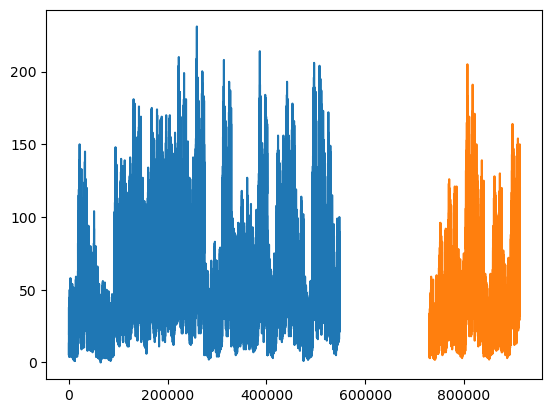

In [19]:
plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)

<AxesSubplot:ylabel='Frequency'>

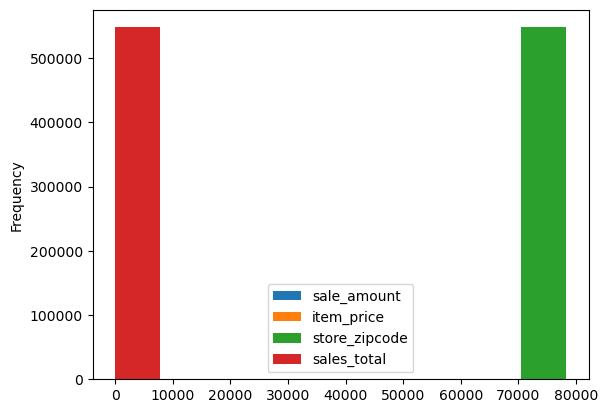

In [21]:
train.plot.hist()


<AxesSubplot:>

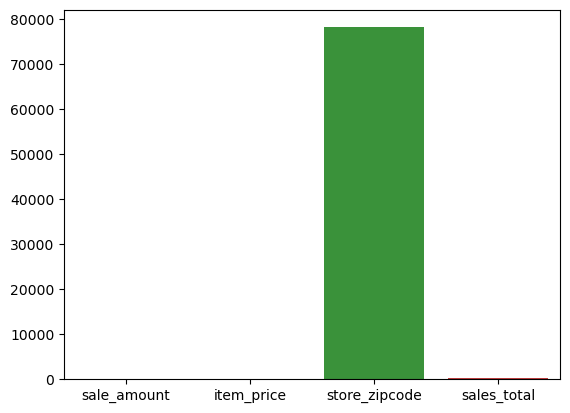

In [23]:
sns.barplot(data= train)


<AxesSubplot:xlabel='sale_amount', ylabel='item_price'>

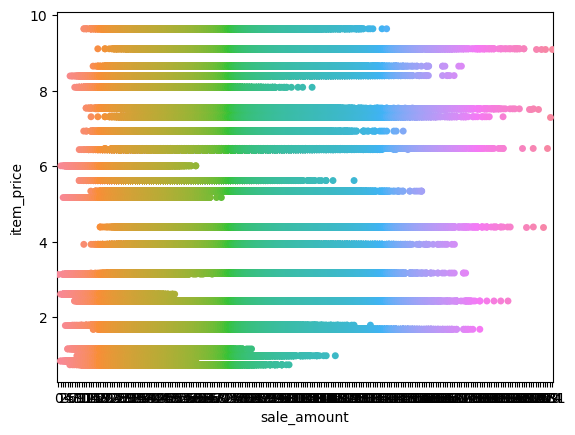

In [29]:
sns.stripplot(data= train, x= 'sale_amount', y= 'item_price' )

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

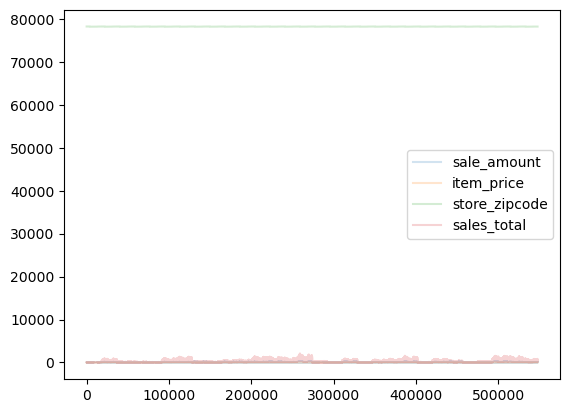

In [34]:
train.plot(alpha=.2, label='Hourly')
train.resample('D').mean().plot(alpha=.5, label='Daily')
train.resample('W').mean().plot(alpha=.8, label='Weekly')
train.resample('M').mean().plot(label='Montly')
train.resample('Y').mean().plot(label='Yearly')
plt.legend()
